# Hierarchical KMeans
Hierarchical KMeans gồm 2 thuật toán là agglomerative clustering and divisive clustering:
* Agglomerative clustering: Đây là cách tiếp cận bottom-up. Tức là coi mỗi sample như là một cluster sau đó tiến hành bắt cặp các cụm và gom lại cứ thế tuần tự
* Divisive clustering: Đây là cách tiếp cận top-down. Ban đầu coi tất cả samples đều chung 1 cluster. Sau đó split chúng theo từng tự.

Ở bài thực hành này chúng ta sẽ tiến hành khảo sát thuật toán agglomerative clustering với các linkage distances của 2 cụm như:
* Ward
* Complete
* Single
* Average

Ở phần demo chúng ta sẽ nhìn sơ qua về hiệu quả của từng loại distance

In [9]:
print(__doc__)
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

from sklearn import manifold, datasets
from sklearn.cluster import AgglomerativeClustering

import numpy as np            
import pandas as pd 

X, y = datasets.load_digits(return_X_y=True)

Automatically created module for IPython interactive environment


đây là bộ dữ liệu tập hợp các ảnh chứa các số từ 0 đến 9

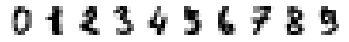

In [12]:
#in thử 10 ảnh ra
images_and_labels = list(zip(X, y))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(1, 10, index + 1)
    plt.axis('off')
    plt.imshow(image.reshape(8,8), cmap=plt.cm.gray_r, interpolation='nearest')

In [3]:
# Không cần quan tâm đoạn này lắm
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Computing embedding
Done.
ward :	0.11s
average :	0.08s
complete :	0.10s
single :	0.03s


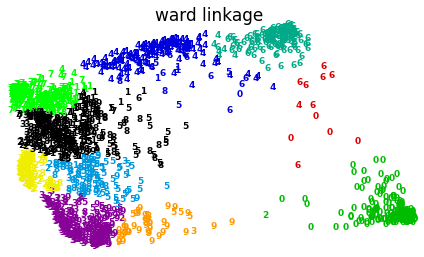

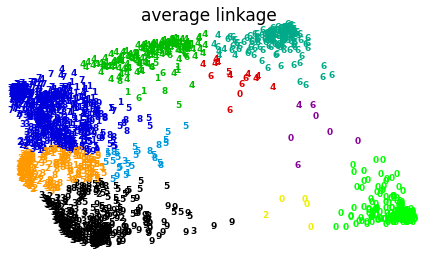

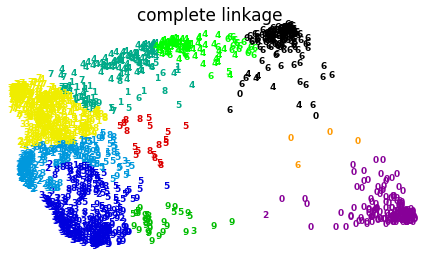

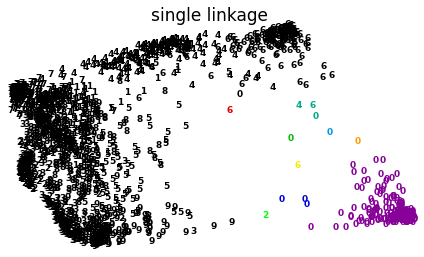

In [4]:
#agglomerative clustering 
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X) #convert vector có 64 componets về vector có 2 components
print("Done.")

from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10) #Chọn 10 cụm vì thức chất data ở đây có 10
    t0 = time()
    clustering.fit(X_red)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)


plt.show()

#Bài Tập

1. Dùng thư viện sch.dendrogram để vẽ ra dendrogram chọn ra số cụm thích hợp và dùng hierachical kmeans để gom cụm lại.
2. Vẽ hình biểu diễn các cụm
* Lưu ý dùng cả 4 distances ở trên

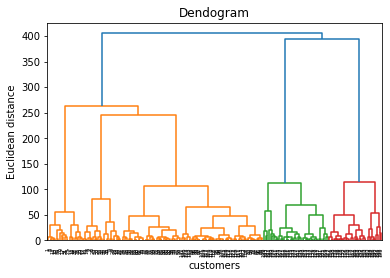

In [20]:
# import the datset
dataset = pd.read_csv('https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-06/bt1.csv')
X = dataset.iloc[:,[3,4]].values
y = ['o' for i in range(len(dataset))]
import scipy.cluster.hierarchy as sch
# make a dendogram used ward method 
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendogram')
plt.xlabel('customers')
plt.ylabel('Euclidean distance')
plt.show()

#Từ đây hãy chọn só cụm thích hơp và phân cụm bằng thuật toán agglomerative clustering

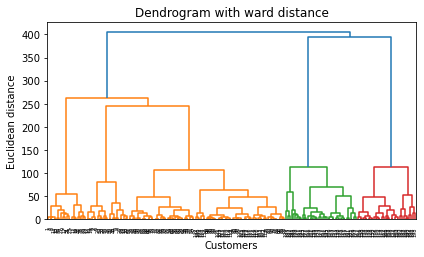

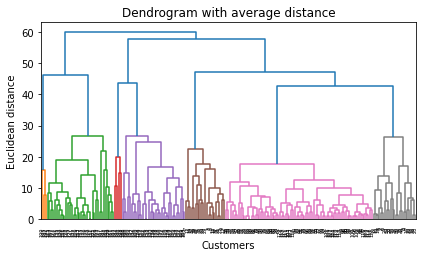

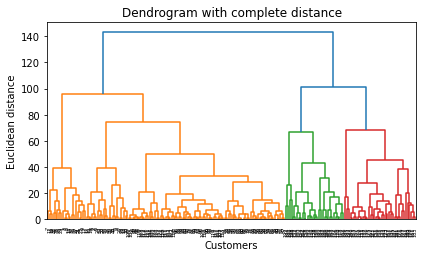

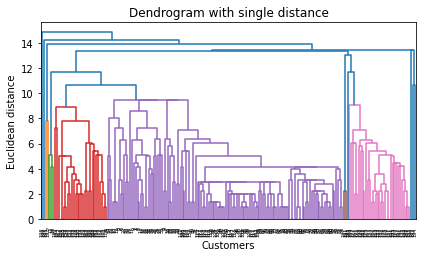

In [29]:
import scipy.cluster.hierarchy as sch
for d_method in ('ward', 'average', 'complete', 'single'):
    plt.figure(figsize=(6, 4))
    dendrogram = sch.dendrogram(sch.linkage(X, method = d_method))
    
    plt.title('Dendrogram with ' + d_method + ' distance')
    plt.xlabel('Customers')
    plt.ylabel('Euclidean distance')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

ward :	0.00s
average :	0.00s
complete :	0.00s
single :	0.00s


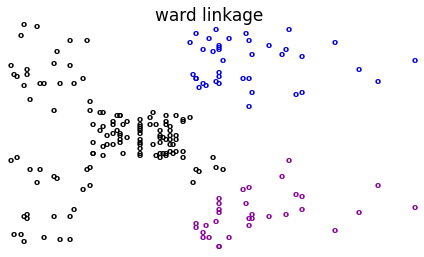

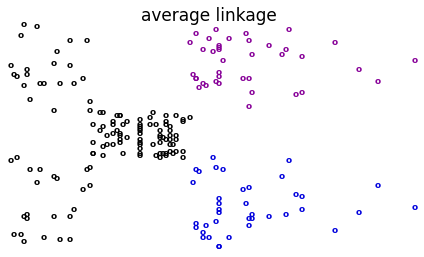

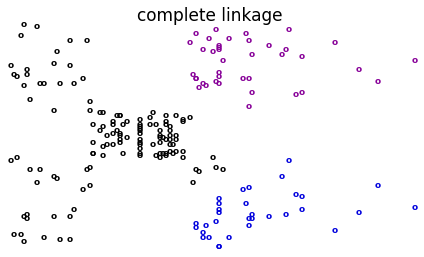

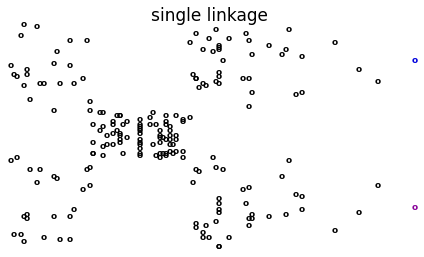

In [37]:
#agglomerative clustering 
from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=3, compute_full_tree = True) #Chọn 5 cụm dựa trên dendogram
    t0 = time()
    clustering.fit(X)
    print("%s :\t%.2fs" % (linkage, time() - t0))

    plot_clustering(X, clustering.labels_, "%s linkage" % linkage)


plt.show()

In [14]:
help(plt.colormaps)

Help on function colormaps in module matplotlib.pyplot:

colormaps()
    Matplotlib provides a number of colormaps, and others can be added using
    :func:`~matplotlib.cm.register_cmap`.  This function documents the built-in
    colormaps, and will also return a list of all registered colormaps if
    called.
    
    You can set the colormap for an image, pcolor, scatter, etc,
    using a keyword argument::
    
      imshow(X, cmap=cm.hot)
    
    or using the :func:`set_cmap` function::
    
      imshow(X)
      pyplot.set_cmap('hot')
      pyplot.set_cmap('jet')
    
    In interactive mode, :func:`set_cmap` will update the colormap post-hoc,
    allowing you to see which one works best for your data.
    
    All built-in colormaps can be reversed by appending ``_r``: For instance,
    ``gray_r`` is the reverse of ``gray``.
    
    There are several common color schemes used in visualization:
    
    Sequential schemes
      for unipolar data that progresses from low to high


In [19]:
len(dataset)

200